<a href="https://colab.research.google.com/github/Vemira08/NeuroPulse/blob/main/fyp_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Loading the Dataset**


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!cp /content/drive/MyDrive/Dataset/dataset.zip /content

In [6]:
!pip install mne

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 66.9 MB/s eta 0:00:00


In [32]:
import zipfile
import os
import mne
import matplotlib.pyplot as plt
import shutil
import numpy as np


In [3]:
zip_path = "/content/dataset.zip"
extract_path = "/content/dataset_bdf"

In [5]:
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
  zip_ref.extractall(extract_path)

In [8]:
# Path to the extracted dataset
dataset_path = "/content/dataset_bdf"

# Sub-folder paths
healthy_folder = os.path.join(dataset_path, "Healthy")
parkinson_folder = os.path.join(dataset_path, "Parkinson")


In [9]:
# List Healthy EEG files
healthy_files = [os.path.join(healthy_folder, f) for f in os.listdir(healthy_folder) if f.endswith(".bdf")]
print("Healthy Files:", healthy_files)

# List Parkinson EEG files
parkinson_files = [os.path.join(parkinson_folder, f) for f in os.listdir(parkinson_folder) if f.endswith(".bdf")]
print("Parkinson Files:", parkinson_files)


Healthy Files: ['/content/dataset_bdf/Healthy/sub-hc8_ses-hc_task-rest_eeg.bdf', '/content/dataset_bdf/Healthy/sub-hc7_ses-hc_task-rest_eeg.bdf', '/content/dataset_bdf/Healthy/sub-hc25_ses-hc_task-rest_eeg.bdf', '/content/dataset_bdf/Healthy/sub-hc18_ses-hc_task-rest_eeg.bdf', '/content/dataset_bdf/Healthy/sub-hc31_ses-hc_task-rest_eeg.bdf', '/content/dataset_bdf/Healthy/sub-hc30_ses-hc_task-rest_eeg.bdf', '/content/dataset_bdf/Healthy/sub-hc32_ses-hc_task-rest_eeg.bdf', '/content/dataset_bdf/Healthy/sub-hc20_ses-hc_task-rest_eeg.bdf', '/content/dataset_bdf/Healthy/sub-hc10_ses-hc_task-rest_eeg.bdf', '/content/dataset_bdf/Healthy/sub-hc29_ses-hc_task-rest_eeg.bdf', '/content/dataset_bdf/Healthy/sub-hc21_ses-hc_task-rest_eeg.bdf', '/content/dataset_bdf/Healthy/sub-hc33_ses-hc_task-rest_eeg.bdf', '/content/dataset_bdf/Healthy/sub-hc2_ses-hc_task-rest_eeg.bdf', '/content/dataset_bdf/Healthy/sub-hc4_ses-hc_task-rest_eeg.bdf', '/content/dataset_bdf/Healthy/sub-hc1_ses-hc_task-rest_eeg.bdf',

Extracting EDF parameters from /content/dataset_bdf/Healthy/sub-hc8_ses-hc_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 97791  =      0.000 ...   190.998 secs...
<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, AF3, F7, F3, FC1, FC5, T7, C3, CP1, CP5, P7, P3, Pz, PO3, ...
 chs: 40 EEG, 1 Stimulus
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 104.0 Hz
 meas_date: 2011-03-04 14:27:17 UTC
 nchan: 41
 projs: []
 sfreq: 512.0 Hz
 subject_info: <subject_info | his_id: >
>
['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8', 'Status']
41


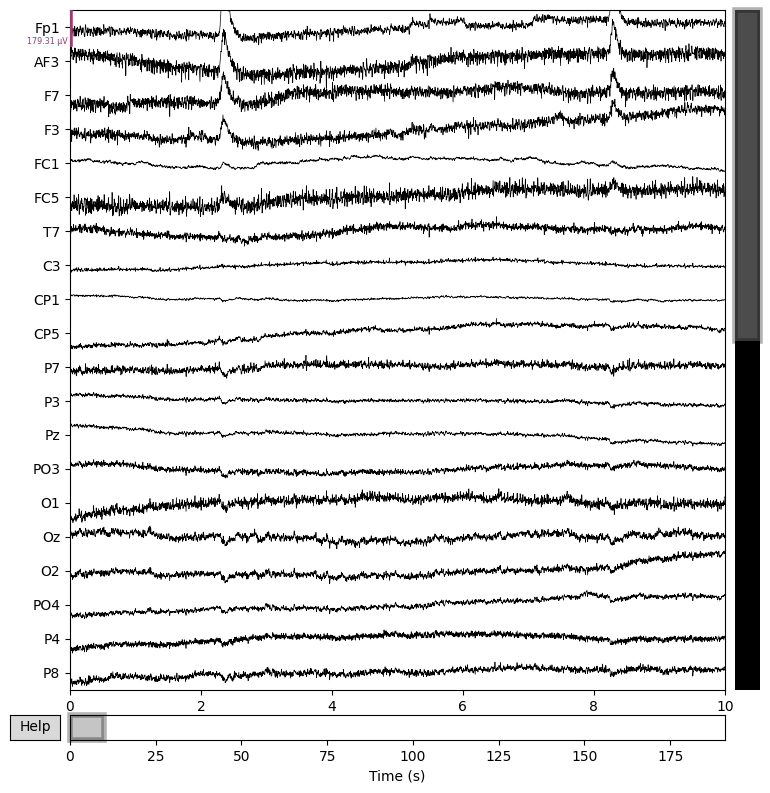

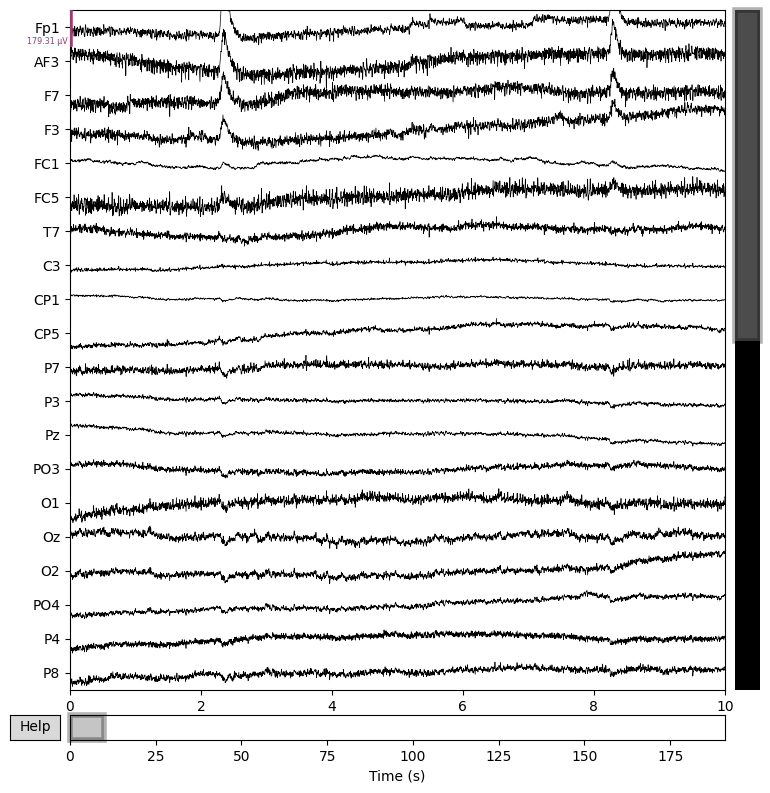

In [13]:
# Select a sample file to load (e.g., the first healthy file)
sample_file = healthy_files[0]  # Replace with parkinson_files[0] for PD files

# Load the BDF file
raw_data = mne.io.read_raw_bdf(sample_file, preload=True)

# Print information about the dataset
print(raw_data.info)
print(raw_data.info['ch_names'])
print(len(raw_data.info['ch_names']))

# Plot a summary of the raw data
raw_data.plot(block=True, scalings='auto')


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


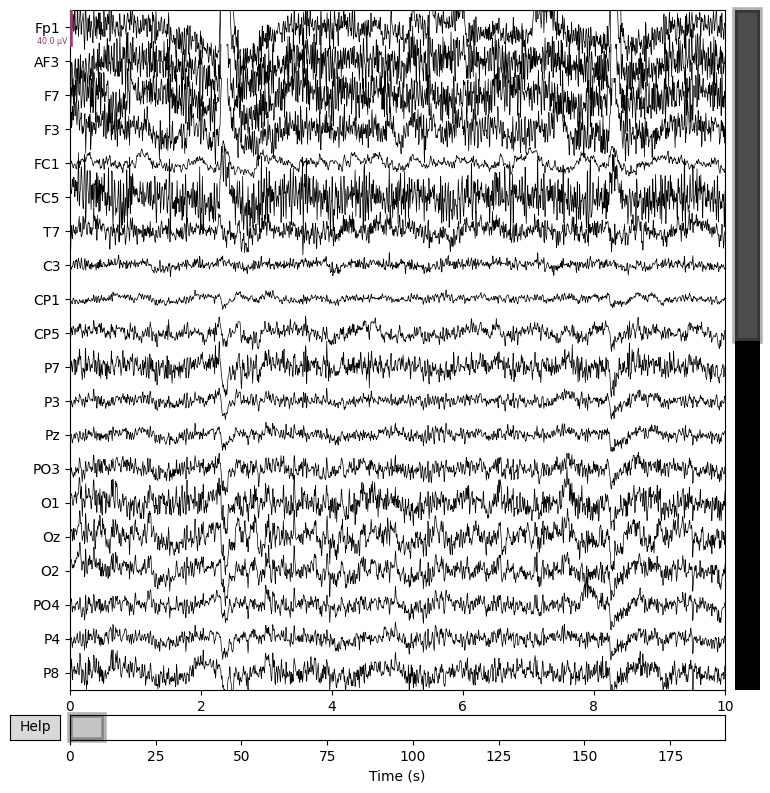

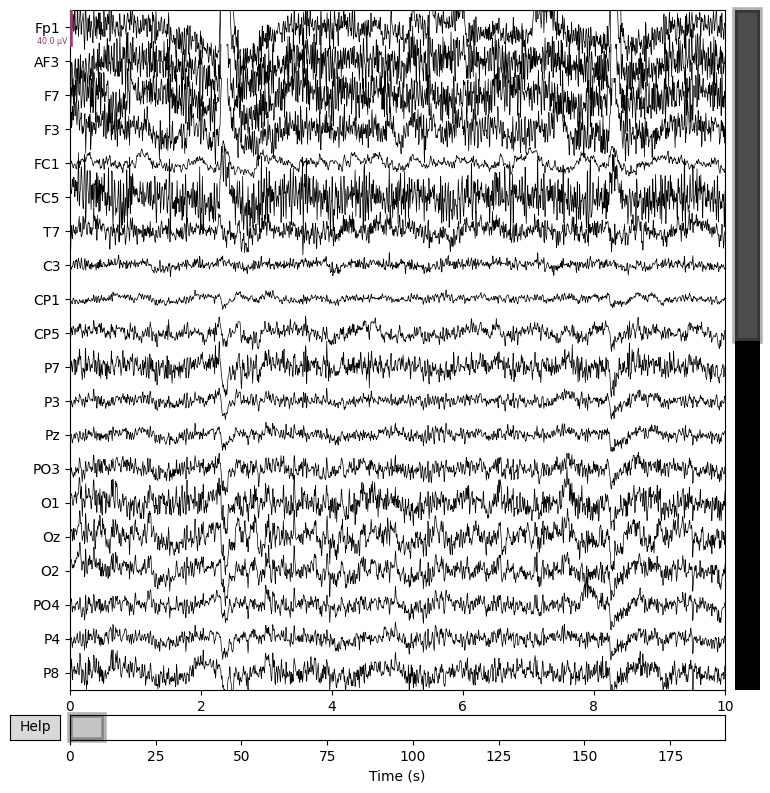

In [17]:
# Apply bandpass filter (1-50 Hz is common for EEG)
raw_data.filter(l_freq=1.0, h_freq=50.0)

# Plot the filtered data
raw_data.plot(duration=10, n_channels=20)


In [18]:
# Create output folders for preprocessed files
preprocessed_healthy_folder = "/content/preprocessed_data/Healthy"
preprocessed_parkinson_folder = "/content/preprocessed_data/Parkinson"
os.makedirs(preprocessed_healthy_folder, exist_ok=True)
os.makedirs(preprocessed_parkinson_folder, exist_ok=True)

In [23]:
# List Healthy EEG files
preprocessed_healthy_files = [os.path.join(preprocessed_healthy_folder, f) for f in os.listdir(preprocessed_healthy_folder) if f.endswith(".fif")]
print("Preprocessed Healthy Files:", preprocessed_healthy_files)

# List Parkinson EEG files
preprocessed_parkinson_files = [os.path.join(preprocessed_parkinson_folder, f) for f in os.listdir(preprocessed_parkinson_folder) if f.endswith(".fif")]
print("Preprocessed Parkinson Files:", preprocessed_parkinson_files)

Preprocessed Healthy Files: ['/content/preprocessed_data/Healthy/sub-hc30_ses-hc_task-rest_eeg-raw.fif', '/content/preprocessed_data/Healthy/sub-hc1_ses-hc_task-rest_eeg-raw.fif', '/content/preprocessed_data/Healthy/sub-hc33_ses-hc_task-rest_eeg-raw.fif', '/content/preprocessed_data/Healthy/sub-hc7_ses-hc_task-rest_eeg-raw.fif', '/content/preprocessed_data/Healthy/sub-hc25_ses-hc_task-rest_eeg-raw.fif', '/content/preprocessed_data/Healthy/sub-hc31_ses-hc_task-rest_eeg-raw.fif', '/content/preprocessed_data/Healthy/sub-hc29_ses-hc_task-rest_eeg-raw.fif', '/content/preprocessed_data/Healthy/sub-hc24_ses-hc_task-rest_eeg-raw.fif', '/content/preprocessed_data/Healthy/sub-hc2_ses-hc_task-rest_eeg-raw.fif', '/content/preprocessed_data/Healthy/sub-hc8_ses-hc_task-rest_eeg-raw.fif', '/content/preprocessed_data/Healthy/sub-hc21_ses-hc_task-rest_eeg-raw.fif', '/content/preprocessed_data/Healthy/sub-hc10_ses-hc_task-rest_eeg-raw.fif', '/content/preprocessed_data/Healthy/sub-hc4_ses-hc_task-rest_ee

Opening raw data file /content/preprocessed_data/Parkinson/sub-pd12_ses-on_task-rest_eeg-raw.fif...
Isotrak not found
    Range : 0 ... 24575 =      0.000 ...   191.992 secs
Ready.
Reading 0 ... 24575  =      0.000 ...   191.992 secs...
<Info | 11 non-empty values
 bads: []
 ch_names: Fp1, AF3, F7, F3, FC1, FC5, T7, C3, CP1, CP5, P7, P3, Pz, PO3, ...
 chs: 40 EEG, 1 Stimulus
 custom_ref_applied: True
 file_id: 4 items (dict)
 highpass: 1.0 Hz
 lowpass: 50.0 Hz
 meas_date: 2011-03-22 12:23:08 UTC
 meas_id: 4 items (dict)
 nchan: 41
 projs: []
 sfreq: 128.0 Hz
 subject_info: <subject_info | >
>


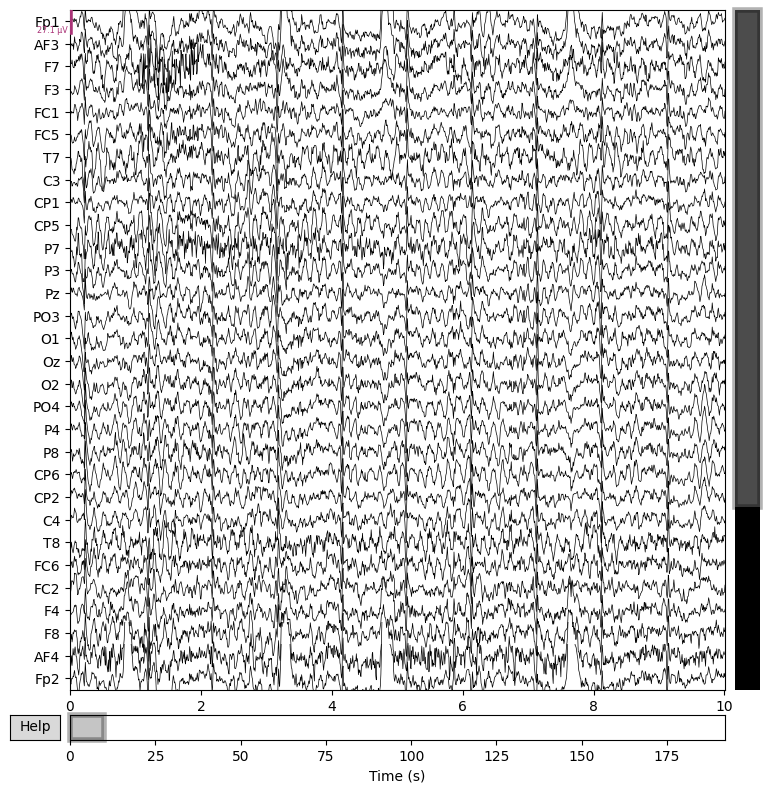

Effective window size : 16.000 (s)
Plotting power spectral density (dB=True).


<ipython-input-26-6c9274d929a6>:16: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_data.compute_psd(fmax=50).plot(picks="data",exclude="bads",amplitude=False)


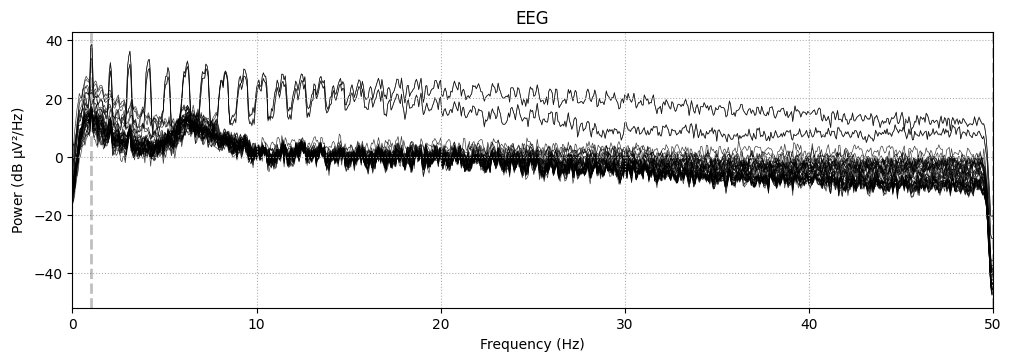

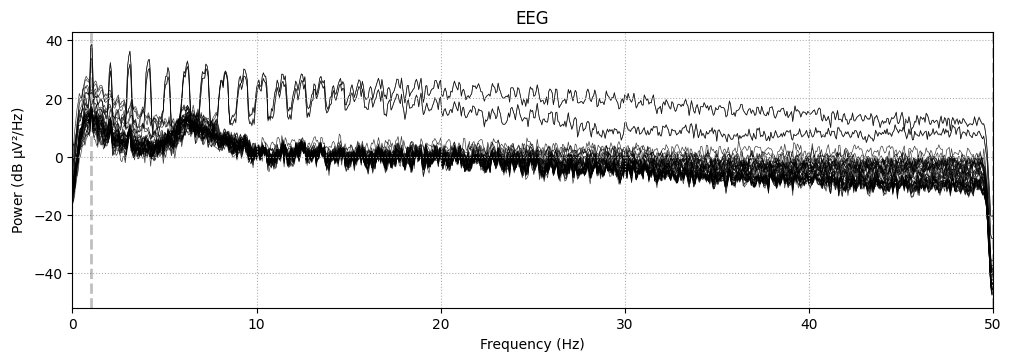

In [26]:
# Example file path for a preprocessed healthy EEG file
eeg_file = preprocessed_parkinson_files[0]  # Modify to select a specific file

# Load the .fif file
raw_data = mne.io.read_raw_fif(eeg_file, preload=True)

# Display basic info about the dataset
print(raw_data.info)

# Plot the raw EEG data
raw_data.plot(duration=10, n_channels=30, scalings='auto')

# Alternatively, you can visualize specific channels or events if applicable
# Example: plot the power spectral density (PSD)
#raw_data.plot_psd(fmin=1, fmax=50)
raw_data.compute_psd(fmax=50).plot(picks="data",exclude="bads",amplitude=False)


In [31]:
# Define paths to the preprocessed folders
preprocessed_healthy_folder = "/content/preprocessed_data/Healthy"
preprocessed_parkinson_folder = "/content/preprocessed_data/Parkinson"

# Verify folders exist
print("Healthy folder exists:", os.path.exists(preprocessed_healthy_folder))
print("Parkinson folder exists:", os.path.exists(preprocessed_parkinson_folder))

# If folders are missing, print an error message
if not os.path.exists(preprocessed_healthy_folder) or not os.path.exists(preprocessed_parkinson_folder):
    raise FileNotFoundError("One or more preprocessed folders are missing. Please verify the preprocessing step.")

# Define output folders for training and testing data
train_healthy_folder = "/content/preprocessed_data/train/Healthy"
test_healthy_folder = "/content/preprocessed_data/test/Healthy"
train_parkinson_folder = "/content/preprocessed_data/train/Parkinson"
test_parkinson_folder = "/content/preprocessed_data/test/Parkinson"

# Create directories if they don't exist
os.makedirs(train_healthy_folder, exist_ok=True)
os.makedirs(test_healthy_folder, exist_ok=True)
os.makedirs(train_parkinson_folder, exist_ok=True)
os.makedirs(test_parkinson_folder, exist_ok=True)

# Define test subjects for Healthy and Parkinson
healthy_test_subjects = ["sub-hc32", "sub-hc33"]
parkinson_test_subjects = ["sub-pd26","sub-pd28"]

# Function to split files into train and test
def split_files(folder_path, test_subjects, train_folder, test_folder):
    print(f"Splitting files in: {folder_path}")
    for file_name in os.listdir(folder_path):
        # Check if the file is a `.fif` file
        if file_name.endswith("-raw.fif"):
            if any(sub in file_name for sub in test_subjects):
                shutil.move(os.path.join(folder_path, file_name), os.path.join(test_folder, file_name))
            else:
                shutil.move(os.path.join(folder_path, file_name), os.path.join(train_folder, file_name))

# Split Healthy files
split_files(preprocessed_healthy_folder, healthy_test_subjects, train_healthy_folder, test_healthy_folder)

# Split Parkinson files
split_files(preprocessed_parkinson_folder, parkinson_test_subjects, train_parkinson_folder, test_parkinson_folder)

print("Files have been divided into training and testing sets.")

Healthy folder exists: True
Parkinson folder exists: True
Splitting files in: /content/preprocessed_data/Healthy
Splitting files in: /content/preprocessed_data/Parkinson
Files have been divided into training and testing sets.


In [44]:
# Define a function to apply augmentations and save
def augment_and_save(raw, save_path, augment_type, **kwargs):
    """Apply augmentation and save the augmented file."""
    if augment_type == "noise":
        augmented = add_noise(raw, noise_level=kwargs.get("noise_level", 0.05))
    elif augment_type == "crop":
        augmented = crop_eeg(raw, duration=kwargs.get("duration", 10))
    elif augment_type == "stretch":
        augmented = time_stretch(raw, stretch_factor=kwargs.get("stretch_factor", 1.2))
    elif augment_type == "dropout":
        augmented = channel_dropout(raw, drop_ratio=kwargs.get("drop_ratio", 0.1))
    else:
        raise ValueError("Unknown augmentation type!")

    # Save the augmented file
    file_name = os.path.basename(save_path).replace("-raw.fif", f"-{augment_type}-aug.fif")
    augmented.save(os.path.join(os.path.dirname(save_path), file_name), overwrite=True)

# Augment all files in a folder
def augment_dataset(folder_path, augment_types):
    for file_name in os.listdir(folder_path):
        if file_name.endswith("-raw.fif"):
            raw = mne.io.read_raw_fif(os.path.join(folder_path, file_name), preload=True)
            for augment_type in augment_types:
                augment_and_save(raw, os.path.join(folder_path, file_name), augment_type)

# Apply augmentations to Healthy and Parkinson datasets
augment_types = ["noise", "crop", "stretch"]
augment_dataset(preprocessed_healthy_folder, augment_types)
augment_dataset(preprocessed_parkinson_folder, augment_types)

In [45]:
# Paths to the preprocessed folders
train_healthy_folder = "/content/preprocessed_data/train/Healthy"
train_parkinson_folder = "/content/preprocessed_data/train/Parkinson"
test_healthy_folder = "/content/preprocessed_data/test/Healthy"
test_parkinson_folder = "/content/preprocessed_data/test/Parkinson"

def load_data(folder_path, label, n_channels=64, n_timepoints=5000):
    """
    Load EEG data from .fif files and standardize shape.
    Args:
        folder_path: Path to the folder with .fif files.
        label: Label for the data (0 or 1).
        n_channels: Number of EEG channels (default: 64).
        n_timepoints: Fixed number of timepoints for all recordings.
    Returns:
        data: List of standardized EEG data arrays.
        labels: Corresponding labels for the data.
    """
    data = []
    labels = []
    for file_name in os.listdir(folder_path):
        if file_name.endswith("-raw.fif"):
            file_path = os.path.join(folder_path, file_name)
            raw = mne.io.read_raw_fif(file_path, preload=True)

            # Get data array (channels x timepoints)
            eeg_data = raw.get_data()  # Shape: (n_channels, n_times)

            # Standardize shape
            if eeg_data.shape[1] > n_timepoints:  # Trim
                eeg_data = eeg_data[:, :n_timepoints]
            elif eeg_data.shape[1] < n_timepoints:  # Pad
                padding = np.zeros((eeg_data.shape[0], n_timepoints - eeg_data.shape[1]))
                eeg_data = np.concatenate((eeg_data, padding), axis=1)

            # Add to dataset
            data.append(eeg_data)
            labels.append(label)

    return np.array(data), np.array(labels)

    # Load training data
healthy_data, healthy_labels = load_data(train_healthy_folder, label=0)  # Healthy = 0
parkinson_data, parkinson_labels = load_data(train_parkinson_folder, label=1)  # Parkinson = 1

# Combine data and labels
X_train = np.concatenate((healthy_data, parkinson_data), axis=0)
y_train = np.concatenate((healthy_labels, parkinson_labels), axis=0)

# Shuffle training data
train_indices = np.arange(len(X_train))
np.random.shuffle(train_indices)
X_train = X_train[train_indices]
y_train = y_train[train_indices]

# Load test data
test_healthy_data, test_healthy_labels = load_data(test_healthy_folder, label=0)
test_parkinson_data, test_parkinson_labels = load_data(test_parkinson_folder, label=1)

X_test = np.concatenate((test_healthy_data, test_parkinson_data), axis=0)
y_test = np.concatenate((test_healthy_labels, test_parkinson_labels), axis=0)

# Shuffle test data
test_indices = np.arange(len(X_test))
np.random.shuffle(test_indices)
X_test = X_test[test_indices]
y_test = y_test[test_indices]

print(f"Training Data Shape: {X_train.shape}, Labels Shape: {y_train.shape}")
print(f"Test Data Shape: {X_test.shape}, Labels Shape: {y_test.shape}")



Opening raw data file /content/preprocessed_data/train/Healthy/sub-hc30_ses-hc_task-rest_eeg-raw.fif...
Isotrak not found
    Range : 0 ... 24191 =      0.000 ...   188.992 secs
Ready.
Reading 0 ... 24191  =      0.000 ...   188.992 secs...
Opening raw data file /content/preprocessed_data/train/Healthy/sub-hc1_ses-hc_task-rest_eeg-raw.fif...
Isotrak not found
    Range : 0 ... 24575 =      0.000 ...   191.992 secs
Ready.
Reading 0 ... 24575  =      0.000 ...   191.992 secs...
Opening raw data file /content/preprocessed_data/train/Healthy/sub-hc7_ses-hc_task-rest_eeg-raw.fif...
Isotrak not found
    Range : 0 ... 24575 =      0.000 ...   191.992 secs
Ready.
Reading 0 ... 24575  =      0.000 ...   191.992 secs...
Opening raw data file /content/preprocessed_data/train/Healthy/sub-hc25_ses-hc_task-rest_eeg-raw.fif...
Isotrak not found
    Range : 0 ... 25855 =      0.000 ...   201.992 secs
Ready.
Reading 0 ... 25855  =      0.000 ...   201.992 secs...
Opening raw data file /content/preproc

In [48]:
def build_cnn_lstm_model(input_shape):
    """
    Build a CNN-LSTM model for EEG classification.

    Args:
        input_shape: Shape of the input data (n_channels, n_timepoints, 1).

    Returns:
        A compiled CNN-LSTM model.
    """
    model = models.Sequential()

    # CNN Block
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.3))

    # Use Global Average Pooling to flatten output
    model.add(layers.GlobalAveragePooling2D())

    # LSTM Block
    model.add(layers.Reshape((1, -1)))  # Reshape to feed to LSTM (timesteps, features)
    model.add(layers.LSTM(64, return_sequences=True))
    model.add(layers.LSTM(32))

    # Fully Connected Layer
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(1, activation='sigmoid'))  # Output for binary classification (PD or not)

    # Compile the model
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model





In [51]:
from sklearn.model_selection import train_test_split
import numpy as np

# Split the combined dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

# Verify shapes of the datasets
print(f"Training Data: {X_train.shape}, Labels: {y_train.shape}")
print(f"Validation Data: {X_val.shape}, Labels: {y_val.shape}")
print(f"Test Data: {X_test.shape}, Labels: {y_test.shape}")

input_shape = (41, 5000, 1)
model = build_cnn_lstm_model(input_shape)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val, y_val)
)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")


Training Data: (16, 41, 5000), Labels: (16,)
Validation Data: (4, 41, 5000), Labels: (4,)
Test Data: (6, 41, 5000), Labels: (6,)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 33s 33s/step - accuracy: 0.6250 - loss: 0.6929 - val_accuracy: 0.7500 - val_loss: 0.6919
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - accuracy: 0.6250 - loss: 0.6910 - val_accuracy: 0.7500 - val_loss: 0.6907
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.6250 - loss: 0.6907 - val_accuracy: 0.7500 - val_loss: 0.6893
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.6250 - loss: 0.6863 - val_accuracy: 0.7500 - val_loss: 0.6879
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step - accuracy: 0.6250 - loss: 0.6867 - val_accuracy: 0.7500 - val_loss: 0.6864
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 22s 22s/step - accuracy: 0.6250 - loss: 0.6852 - val_accuracy: 0.7500 - val_loss: 0.6847
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 20s 20s/step - accuracy: 0.6250 - loss: 0.6837 - val_accuracy: 0.7500 - val_loss: 0.6829
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 19s 19s/step - accuracy: 0.6250 - loss: 0.6806 - val_accuracy: 0.7500 - val_loss: 0.6811
Ep